<a href="https://www.kaggle.com/code/parthagrawal21/with-whom-we-spend-time?scriptVersionId=124352125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-spent-with-relationships-by-age-usa/time-spent-with-relationships-by-age-us.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data =  pd.read_csv('/kaggle/input/time-spent-with-relationships-by-age-usa/time-spent-with-relationships-by-age-us.csv')

In [4]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Time spent alone, by age of respondent (United States)',
       'Time spent with friends, by age of respondent (United States)',
       'Time spent with children, by age of respondent (United States)',
       'Time spent with with parents, siblings and other family, by age of respondent (United States)',
       'Time spent with partner, by age of respondent (United States)',
       'Time spent with coworkers, by age of respondent (United States)'],
      dtype='object')

In [5]:
data.head()

,Entity,Code,Year,"Time spent alone, by age of respondent (United States)","Time spent with friends, by age of respondent (United States)","Time spent with children, by age of respondent (United States)","Time spent with with parents, siblings and other family, by age of respondent (United States)","Time spent with partner, by age of respondent (United States)","Time spent with coworkers, by age of respondent (United States)"
0,United States,USA,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,United States,USA,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,United States,USA,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,United States,USA,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,United States,USA,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


In [6]:
new_data = data.rename(columns = {'Time spent with with parents, siblings and other family, by age of respondent (United States)':'Time spent with family','Time spent alone, by age of respondent (United States)':'Time spent alone','Time spent with friends, by age of respondent (United States)':'Time spent with friends','Time spent with children, by age of respondent (United States)':'Time spent with childrens','Time spent with partner, by age of respondent (United States)':'Time spent with life Partner','Time spent with coworkers, by age of respondent (United States)':'Time spent with co-workers'})

In [7]:
new_data.describe()

,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,48.059701,348.618974,52.297102,116.890738,81.602015,182.717405,125.286948
std,19.593506,85.989956,28.672687,77.893454,50.512878,72.101971,73.394229
min,15.000000,193.305880,28.917883,23.463852,47.977863,0.000000,3.249441
25%,31.500000,269.006010,35.923460,55.018915,57.617891,178.111140,44.183857
50%,48.000000,338.247560,39.297825,78.608688,63.962303,194.686520,162.922270
75%,64.500000,432.920700,50.328777,186.012915,71.001439,229.447600,185.699770
max,85.000000,501.883270,137.751070,266.078740,267.120910,276.133790,215.613650


In [8]:
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,United States,USA,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,United States,USA,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,United States,USA,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,United States,USA,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


In [9]:
new_data['Time spent alone'] = (new_data['Time spent alone'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,109.41450,23.463852,267.12091,0.000000,8.342007
1,United States,USA,16,3.439509,110.74180,28.609867,254.33810,0.030691,23.529137
2,United States,USA,17,3.736222,120.41887,26.089708,229.81561,1.122841,43.809685
3,United States,USA,18,4.044973,137.75107,27.387308,236.35201,5.697267,81.633575
4,United States,USA,19,4.463231,129.85716,36.445004,201.27660,19.341291,124.850520


In [10]:
new_data['Time spent with friends'] = (new_data['Time spent with friends'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,1.823575,23.463852,267.12091,0.000000,8.342007
1,United States,USA,16,3.439509,1.845697,28.609867,254.33810,0.030691,23.529137
2,United States,USA,17,3.736222,2.006981,26.089708,229.81561,1.122841,43.809685
3,United States,USA,18,4.044973,2.295851,27.387308,236.35201,5.697267,81.633575
4,United States,USA,19,4.463231,2.164286,36.445004,201.27660,19.341291,124.850520


In [11]:
new_data['Time spent with childrens'] = (new_data['Time spent with childrens'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,1.823575,0.391064,267.12091,0.000000,8.342007
1,United States,USA,16,3.439509,1.845697,0.476831,254.33810,0.030691,23.529137
2,United States,USA,17,3.736222,2.006981,0.434828,229.81561,1.122841,43.809685
3,United States,USA,18,4.044973,2.295851,0.456455,236.35201,5.697267,81.633575
4,United States,USA,19,4.463231,2.164286,0.607417,201.27660,19.341291,124.850520


In [12]:
new_data['Time spent with family'] = (new_data['Time spent with family'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,1.823575,0.391064,4.452015,0.000000,8.342007
1,United States,USA,16,3.439509,1.845697,0.476831,4.238968,0.030691,23.529137
2,United States,USA,17,3.736222,2.006981,0.434828,3.830260,1.122841,43.809685
3,United States,USA,18,4.044973,2.295851,0.456455,3.939200,5.697267,81.633575
4,United States,USA,19,4.463231,2.164286,0.607417,3.354610,19.341291,124.850520


In [13]:
new_data['Time spent with life Partner'] = (new_data['Time spent with life Partner'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,1.823575,0.391064,4.452015,0.000000,8.342007
1,United States,USA,16,3.439509,1.845697,0.476831,4.238968,0.000512,23.529137
2,United States,USA,17,3.736222,2.006981,0.434828,3.830260,0.018714,43.809685
3,United States,USA,18,4.044973,2.295851,0.456455,3.939200,0.094954,81.633575
4,United States,USA,19,4.463231,2.164286,0.607417,3.354610,0.322355,124.850520


In [14]:
new_data['Time spent with co-workers'] = (new_data['Time spent with co-workers'].divide(60))
new_data.head()

,Entity,Code,Year,Time spent alone,Time spent with friends,Time spent with childrens,Time spent with family,Time spent with life Partner,Time spent with co-workers
0,United States,USA,15,3.221765,1.823575,0.391064,4.452015,0.000000,0.139033
1,United States,USA,16,3.439509,1.845697,0.476831,4.238968,0.000512,0.392152
2,United States,USA,17,3.736222,2.006981,0.434828,3.830260,0.018714,0.730161
3,United States,USA,18,4.044973,2.295851,0.456455,3.939200,0.094954,1.360560
4,United States,USA,19,4.463231,2.164286,0.607417,3.354610,0.322355,2.080842


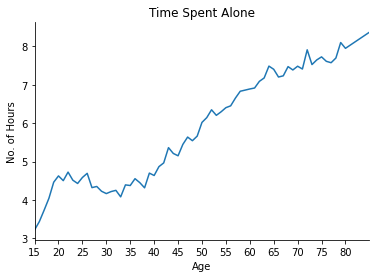

In [15]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent alone", data = new_data)
plt.xlim(15,85)
a = plt.xticks(np.arange(15,85,5))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent Alone')
sns.despine(bottom =False, left = False)

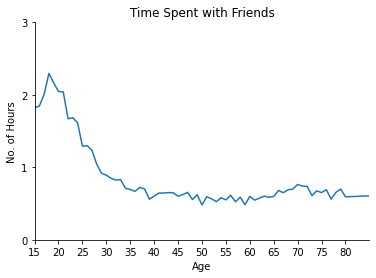

In [16]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent with friends", data = new_data)
fig.axis(xmin=15, xmax=85);
a = plt.xticks(np.arange(15,85,5))
c = plt.yticks(np.arange(0,4,1))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent with Friends')
sns.despine(bottom =False, left = False)

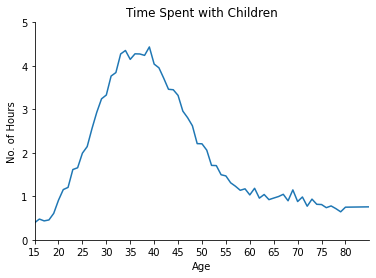

In [17]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent with childrens", data = new_data)
fig.axis(xmin=15, xmax=85);
a = plt.xticks(np.arange(15,85,5))
c = plt.yticks(np.arange(0,6,1))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent with Children')
sns.despine(bottom =False, left = False)

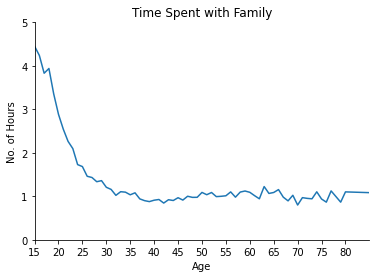

In [18]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent with family", data = new_data)
fig.axis(xmin=15, xmax=85);
a = plt.xticks(np.arange(15,85,5))
c = plt.yticks(np.arange(0,6,1))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent with Family')
sns.despine(bottom =False, left = False)

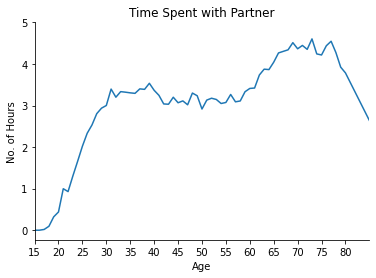

In [19]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent with life Partner", data = new_data)
fig.axis(xmin=15, xmax=85);
a = plt.xticks(np.arange(15,85,5))
c = plt.yticks(np.arange(0,6,1))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent with Partner')
sns.despine(bottom =False, left = False)

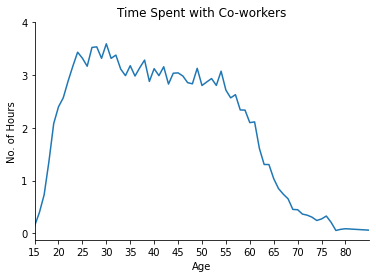

In [20]:
ax= plt.subplots(figsize=(6,4)) 
fig = sns.lineplot(x="Year",y="Time spent with co-workers", data = new_data)
fig.axis(xmin=15, xmax=85);
a = plt.xticks(np.arange(15,85,5))
c = plt.yticks(np.arange(0,5,1))
b=fig.set(xlabel='Age', ylabel='No. of Hours',title='Time Spent with Co-workers')
sns.despine(bottom =False, left = False)